## Projeto para a Disciplina Ciência de Dados

#### Professor: Bruno Almeida Pimentel

#### Alunos:

##### Rodrigo Ferreira Correia
##### Arthur Rodrigues Sampaio
##### João Vitor Tavares
##### Manoel Pedro de Aranda Terceiro



In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import tensorflow as tf

drive.mount('/content/drive')
hotel_bookings_df = pd.read_csv('/content/drive/MyDrive/Projeto - DS/hotel_bookings.csv')

hotel_bookings_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Visualização dos Dados ##

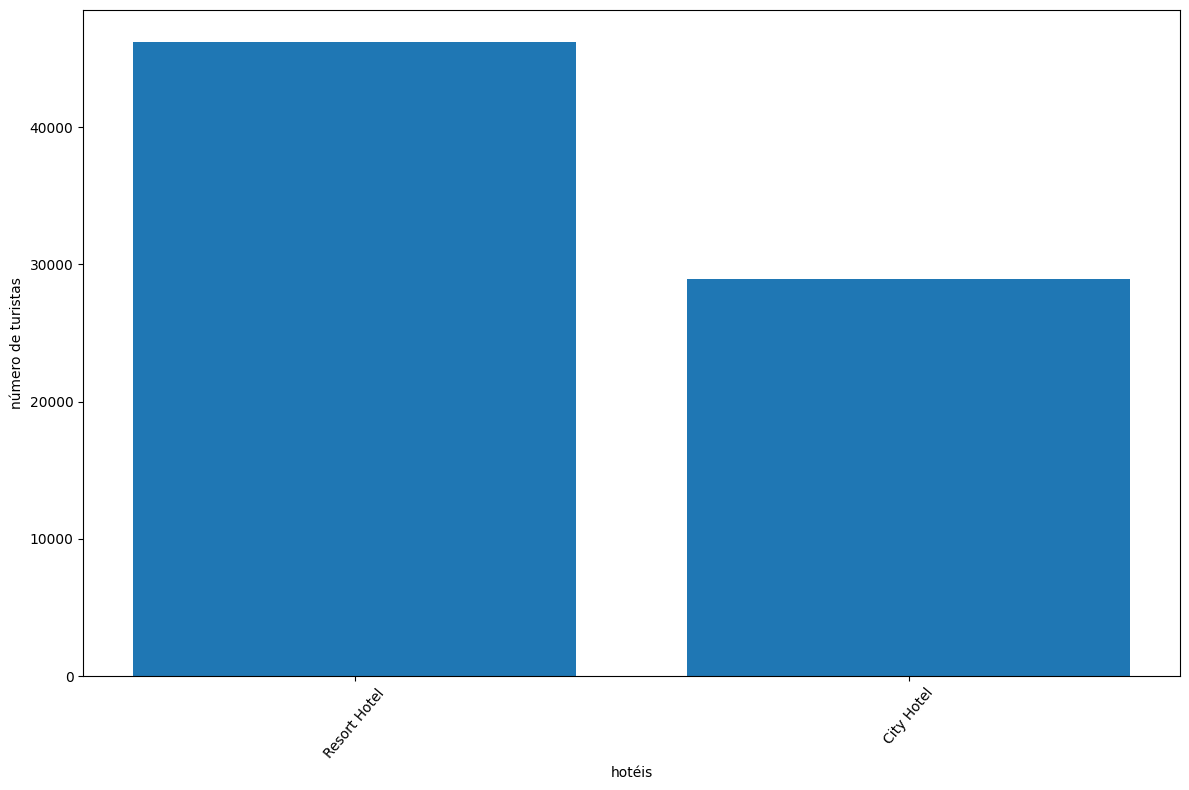

In [2]:
hotel_receptions = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 0]['hotel'].value_counts()

hoteis = hotel_bookings_df['hotel'].unique()

plt.figure(figsize=(12,8))

plt.bar(hoteis, hotel_receptions)

plt.xlabel('hotéis')
plt.ylabel('número de turistas')

plt.xticks(rotation=50)

plt.tight_layout()
plt.show()

In [3]:
from datetime import datetime

def stringToMonthNum(m_string):
  data = datetime.strptime(m_string.lower().strip(), '%B')
  n_month = data.month
  return n_month

In [10]:
def monthNumToString(row):
  data = datetime(year=row['arrival_date_year'], month=row['arrival_date_month'], day=row['arrival_date_day_of_month'])
  month_string = data.strftime('%B')
  return month_string

13803     January
19794     January
19791     January
19789     January
19358     January
           ...   
18867    December
18860    December
18861    December
18863    December
18974    December
Name: arrival_date_month, Length: 28938, dtype: object
arrival_date_month
January       48.708919
February      54.147478
March         57.012487
April         75.867816
May           76.657558
June         107.921869
July         150.122528
August       181.205892
September     96.416860
October       61.727505
November      48.681640
December      68.322236
Name: adr, dtype: float64


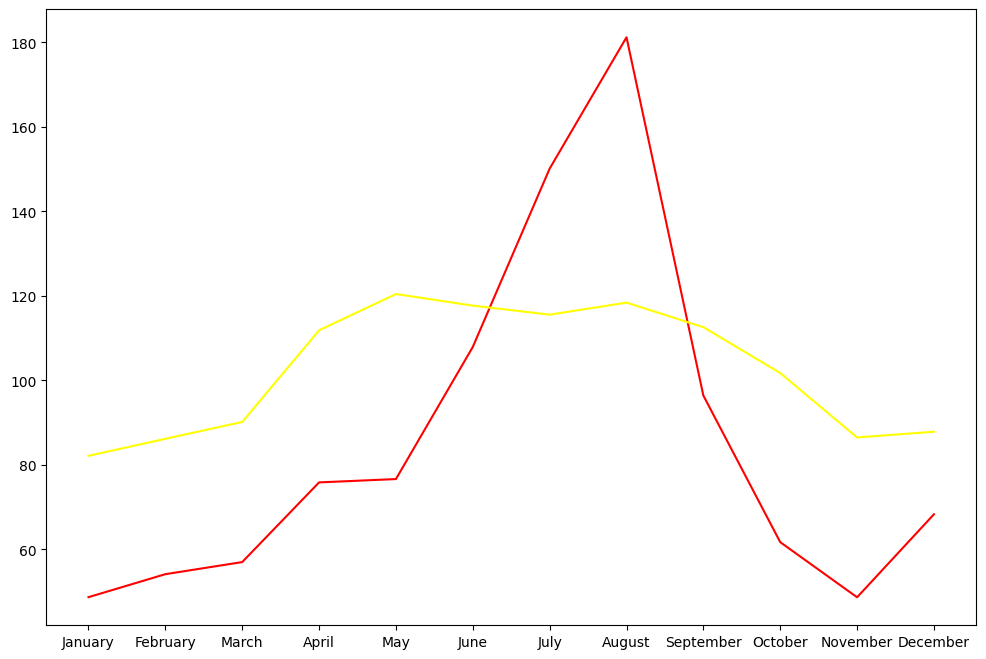

In [20]:
hotel_bookings_df['arrival_date_month'] = hotel_bookings_df['arrival_date_month'].apply(stringToMonthNum)

hotel_bookings_df = hotel_bookings_df.sort_values(by='arrival_date_month')

hotel_bookings_df['arrival_date_month'] = hotel_bookings_df.apply(monthNumToString, axis=1)

resort = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'Resort Hotel') & (hotel_bookings_df['is_canceled'] == 0)]
city_hotel = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'City Hotel') & (hotel_bookings_df['is_canceled'] == 0)]

resort = resort.groupby(['arrival_date_month'], sort=False)['adr'].mean()
city_hotel = city_hotel.groupby(['arrival_date_month'], sort=False)['adr'].mean()

plt.figure(figsize=(12,8))

plt.plot(resort, label='Resort Hotel',color='red')
plt.plot(city_hotel, label='City Hotel',color='yellow')

plt.show()

In [ ]:
#Verificando o tamanho do dataframe

hotel_bookings_df.shape

(119390, 32)

In [ ]:
#Verificando a quantidade de dados nulos ou faltantes existem em cada coluna do dataframe

hotel_bookings_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Visualização dos dados ##

## Pré-processamento e transformação ##

Como a coluna company representa a compania em que o cliente fez a reserva, e seus dados são 90% nulos, iremos descartar a coluna company da análise de negócios

In [ ]:
#

htl_bks_filtrado_df = hotel_bookings_df.drop(['reservation_status_date',
                                              'arrival_date_month', 'arrival_date_week_number'], axis=1)

htl_bks_filtrado_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
str_columns = ['customer_type','deposit_type','distribution_channel', 'hotel', 'meal', 'market_segment', 'reserved_room_type']

htl_bks_strings = hotel_bookings_df[str_columns]

htl_bks_filtrado_df = htl_bks_filtrado_df.drop(str_columns, axis=1)

htl_bks_filtrado_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,...,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,2015,1,0,0,2,0.0,0,PRT,...,0,C,3,NaN,NaN,0,0.0,0,0,Check-Out
1,0,737,2015,1,0,0,2,0.0,0,PRT,...,0,C,4,NaN,NaN,0,0.0,0,0,Check-Out
2,0,7,2015,1,0,1,1,0.0,0,GBR,...,0,C,0,NaN,NaN,0,75.0,0,0,Check-Out
3,0,13,2015,1,0,1,1,0.0,0,GBR,...,0,A,0,304.0,NaN,0,75.0,0,0,Check-Out
4,0,14,2015,1,0,2,2,0.0,0,GBR,...,0,A,0,240.0,NaN,0,98.0,0,1,Check-Out


Realizaremos agora uma transformação dos dados

In [ ]:
htl_bks_strings['hotel'] = htl_bks_strings['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

htl_bks_strings['distribution_channel'] = htl_bks_strings['distribution_channel'].map({'Corporate': 0, 'Direct': 1, 'GDS': 2, 'TA/TO': 3, 'Undefined': 4})
htl_bks_strings['reserved_room_type'] = htl_bks_strings['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2,  'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8})

htl_bks_strings['meal'] = htl_bks_strings['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
htl_bks_strings['market_segment']  = htl_bks_strings['market_segment'].map({'Aviation': 0, 'Corporate': 1, 'Complementary': 2,'Direct': 3, 'Groups': 4,'Online TA': 5, 'Offline TA/TO': 6, 'Undefined': 7})
htl_bks_strings['deposit_type'] = htl_bks_strings['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})
htl_bks_strings['customer_type'] = htl_bks_strings['customer_type'].map({'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3})

htl_bks_strings.head(15)

<ipython-input-9-7a0a6df03d17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['hotel'] = htl_bks_strings['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
<ipython-input-9-7a0a6df03d17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['distribution_channel'] = htl_bks_strings['distribution_channel'].map({'Corporate': 0, 'Direct': 1, 'GDS': 2, 'TA/TO': 3, 'Undefined': 4})
<ipython-input-9-7a0a6df03d17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,customer_type,deposit_type,distribution_channel,hotel,meal,market_segment,reserved_room_type
0,2,0,1,0,0,3,2.0
1,2,0,1,0,0,3,2.0
2,2,0,1,0,0,3,0.0
3,2,0,0,0,0,1,0.0
4,2,0,3,0,0,5,0.0
5,2,0,3,0,0,5,0.0
6,2,0,1,0,0,3,2.0
7,2,0,1,0,1,3,2.0
8,2,0,3,0,0,5,0.0
9,2,0,3,0,2,6,3.0


In [ ]:
htl_bks_filtrado_df.isna().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

hotel_bookings_df = pd.read_csv('/content/drive/MyDrive/Projeto - DS/hotel_bookings.csv')

def label_encode_columns(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    return df

# One-hot encode string columns
df_one_hot_encoded = label_encode_columns(hotel_bookings_df)


sc = StandardScaler()

X = df_one_hot_encoded

X.drop(['agent', 'company', 'reservation_status', 'reservation_status_date'], inplace=True, axis=1)

X.dropna(inplace=True)

X = X[~((X['adults'] == 0) & (X['babies'] == 0) & (X['children'] == 0))]

correlation = X.corr(method='spearman')

Z_score = (X - X.mean()) / X.std()

X = X[(Z_score < 3) & (Z_score > -3)]

y = X['is_canceled']

X.drop(['is_canceled'], inplace=True, axis=1)

X = X.fillna(0)

v = X.value_counts()

X = sc.fit_transform(X)

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True, linewidths=1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, PReLU
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

model = Sequential()
model.add(Dense(units=27, input_dim=27))
model.add(Dense(units=128, activation=PReLU()))
model.add(Dense(units=128, activation=PReLU()))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

score = accuracy_score(y_test, y_pred)

nn_classification_report = classification_report(y_test, y_pred)

print(f'Multi-Layer Perceptron Classifier accuracy: {score}')
print(nn_classification_report)

Epoch 1/30
1677/1677 [==============================] - 16s 6ms/step - loss: 0.1309 - accuracy: 0.8096 - val_loss: 0.1206 - val_accuracy: 0.8248
Epoch 2/30
1677/1677 [==============================] - 12s 7ms/step - loss: 0.1167 - accuracy: 0.8313 - val_loss: 0.1170 - val_accuracy: 0.8262
Epoch 3/30
1677/1677 [==============================] - 6s 4ms/step - loss: 0.1116 - accuracy: 0.8386 - val_loss: 0.1126 - val_accuracy: 0.8349
Epoch 4/30
1677/1677 [==============================] - 5s 3ms/step - loss: 0.1086 - accuracy: 0.8427 - val_loss: 0.1098 - val_accuracy: 0.8384
Epoch 5/30
1677/1677 [==============================] - 4s 3ms/step - loss: 0.1064 - accuracy: 0.8469 - val_loss: 0.1100 - val_accuracy: 0.8392
Epoch 6/30
1677/1677 [==============================] - 6s 4ms/step - loss: 0.1042 - accuracy: 0.8505 - val_loss: 0.1095 - val_accuracy: 0.8420
Epoch 7/30
1677/1677 [==============================] - 5s 3ms/step - loss: 0.1029 - accuracy: 0.8520 - val_loss: 0.1081 - val_accurac

In [ ]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

rf_scores = cross_val_score(rf, X_test, y_test, cv=kf, scoring='accuracy')

rf_predict = rf.predict(X_test)

rf_classification_report = classification_report(y_test, rf_predict)

print(f'RandomForest Score: {rf_scores.mean()}')
print(f'Classification report:\n {rf_classification_report}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=33, weights='distance', p=1, metric='euclidean', algorithm='brute')
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

knn_scores = cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy')
knn_classification_report = classification_report(y_test, knn_predict)

print(f'K-NN Score: {knn_scores.mean()}')
print(f'Classification report K-NN: \n {knn_classification_report}')

K-NN Score: 0.8106686375220103
Classification report K-NN: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      7407
           1       0.85      0.74      0.79      4514

    accuracy                           0.85     11921
   macro avg       0.85      0.83      0.84     11921
weighted avg       0.85      0.85      0.85     11921



Nosso foco aqui foi maximizar a precisão dos modelos, desta forma, conseguimos propôr a ideia de quando um dos clientes irá realizar ou não o cancelamento da hospedagem com uma precisão de 85%, onde os 3 modelos trabalham em conjunto num sistema de votação, sendo necessário q 2 ou mais concordem para que uma posição seja considerada.